Hackaton

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!“Social Sentiment: Global Trends in Public Discussions”!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
# file_path = "messi.csv",
# df = pd.read_csv(file_path)
file_path = ("messi.csv", "ronaldo.csv")

In [4]:
# Read each file separately
df_messi = pd.read_csv(file_path[0])
df_ronaldo = pd.read_csv(file_path[1])

# Concatenate the dataframes if needed
df = pd.concat([df_messi, df_ronaldo], ignore_index=True)

In [5]:
df.head()

,tweet_id,author_id,content,lang,date,source,geo,retweet_count,like_count,quote_count
0,1554369750175780864,936125201540149248,only lionel messi has more in every category,en,2022-08-02T07:33:21.000Z,Twitter for iPhone,-1,0.0,0.0,0.0
1,1554369704265129984,719822976829546497,balls riqui actually had talent at that time h...,en,2022-08-02T07:33:10.000Z,Twitter for Android,-1,0.0,0.0,0.0
2,1554369683473645568,1124462707355181056,when messi winning everything then you will bl...,en,2022-08-02T07:33:05.000Z,Twitter for Android,-1,0.0,0.0,0.0
3,1554369634563940361,1529031568659980288,messi won the treble with barca in,en,2022-08-02T07:32:54.000Z,Twitter for Android,-1,0.0,0.0,0.0
4,1554369624111734785,1217760894563897345,ronaldo only has the ucl competition as a top ...,en,2022-08-02T07:32:51.000Z,Twitter for Android,-1,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967149 entries, 0 to 967148
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tweet_id       967149 non-null  int64  
 1   author_id      967149 non-null  int64  
 2   content        967127 non-null  object 
 3   lang           967149 non-null  object 
 4   date           967149 non-null  object 
 5   source         967149 non-null  object 
 6   geo            967149 non-null  object 
 7   retweet_count  967149 non-null  float64
 8   like_count     967149 non-null  float64
 9   quote_count    967149 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 73.8+ MB


In [7]:
df.describe()

,tweet_id,author_id,retweet_count,like_count,quote_count
count,9.671490e+05,9.671490e+05,967149.000000,967149.000000,967149.000000
mean,1.526351e+18,9.644884e+17,3.139161,37.531435,0.306607
std,1.102250e+16,5.845723e+17,77.103634,851.156641,10.409226
min,1.512352e+18,2.360000e+03,0.000000,0.000000,0.000000
25%,1.515424e+18,7.026224e+17,0.000000,0.000000,0.000000
50%,1.524728e+18,1.239876e+18,0.000000,0.000000,0.000000
75%,1.533542e+18,1.430367e+18,0.000000,2.000000,0.000000
max,1.554370e+18,1.554358e+18,15804.000000,134246.000000,2899.000000


In [8]:
print(df.columns)

Index(['tweet_id', 'author_id', 'content', 'lang', 'date', 'source', 'geo',
       'retweet_count', 'like_count', 'quote_count'],
      dtype='object')


In [9]:
print(df.isnull().sum())

tweet_id          0
author_id         0
content          22
lang              0
date              0
source            0
geo               0
retweet_count     0
like_count        0
quote_count       0
dtype: int64


In [10]:
df.head()

,tweet_id,author_id,content,lang,date,source,geo,retweet_count,like_count,quote_count
0,1554369750175780864,936125201540149248,only lionel messi has more in every category,en,2022-08-02T07:33:21.000Z,Twitter for iPhone,-1,0.0,0.0,0.0
1,1554369704265129984,719822976829546497,balls riqui actually had talent at that time h...,en,2022-08-02T07:33:10.000Z,Twitter for Android,-1,0.0,0.0,0.0
2,1554369683473645568,1124462707355181056,when messi winning everything then you will bl...,en,2022-08-02T07:33:05.000Z,Twitter for Android,-1,0.0,0.0,0.0
3,1554369634563940361,1529031568659980288,messi won the treble with barca in,en,2022-08-02T07:32:54.000Z,Twitter for Android,-1,0.0,0.0,0.0
4,1554369624111734785,1217760894563897345,ronaldo only has the ucl competition as a top ...,en,2022-08-02T07:32:51.000Z,Twitter for Android,-1,0.0,0.0,0.0


In [163]:
# df_ronaldo

In [37]:
# df_messi

Nous affichons les valeurs manquantes pour les deux df (ronaldo et messi) en même temps graçe à la concaténation. RECHERCHE DES VALEURS MANQUANTES POUR LES DEUUX df (ronaldo et messi)

In [11]:

# print("Valeurs manquantes dans Ronaldo:")
# print(df_ronaldo.isnull().sum())

# print("\nValeurs manquantes dans Messi:")
# print(df_messi.isnull().sum())


print("Valeurs manquantes dans les fichier Ronaldo et messi:")
print(df.isnull().sum())


Valeurs manquantes dans les fichier Ronaldo et messi:
tweet_id          0
author_id         0
content          22
lang              0
date              0
source            0
geo               0
retweet_count     0
like_count        0
quote_count       0
dtype: int64


In [12]:
# df_ronaldo = df_ronaldo.dropna()
# df_messi = df_messi.dropna()

df = df.dropna()


Renommer la colonne 'date' en 'Timestamp' avant de convertir en datetime

In [13]:
# # Renommer la colonne 'date' en 'Timestamp' avant de convertir en datetime
# df_ronaldo.rename(columns={"date": "Timestamp"}, inplace=True)
# df_messi.rename(columns={"date": "Timestamp"}, inplace=True)

# # Convertir la colonne Timestamp en format datetime
# df_ronaldo["Timestamp"] = pd.to_datetime(df_ronaldo["Timestamp"], errors="coerce")
# df_messi["Timestamp"] = pd.to_datetime(df_messi["Timestamp"], errors="coerce")


df.rename(columns={"date": "Timestamp"}, inplace=True)

In [70]:
df

,tweet_id,author_id,content,lang,Timestamp,source,geo,retweet_count,like_count,quote_count
0,1554369750175780864,936125201540149248,only lionel messi has more in every category,en,2022-08-02T07:33:21.000Z,Twitter for iPhone,-1,0.0,0.0,0.0
1,1554369704265129984,719822976829546497,balls riqui actually had talent at that time h...,en,2022-08-02T07:33:10.000Z,Twitter for Android,-1,0.0,0.0,0.0
2,1554369683473645568,1124462707355181056,when messi winning everything then you will bl...,en,2022-08-02T07:33:05.000Z,Twitter for Android,-1,0.0,0.0,0.0
3,1554369634563940361,1529031568659980288,messi won the treble with barca in,en,2022-08-02T07:32:54.000Z,Twitter for Android,-1,0.0,0.0,0.0
4,1554369624111734785,1217760894563897345,ronaldo only has the ucl competition as a top ...,en,2022-08-02T07:32:51.000Z,Twitter for Android,-1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
967144,1515850721681416195,597636087,needing a ronaldo hatrick to beat norwich is m...,en,2022-04-18T00:32:29.000Z,Twitter for Android,-1,0.0,0.0,0.0
967145,1515850716518227972,1408952337302011915,this is fake saf said messi is clear,en,2022-04-18T00:32:28.000Z,Twitter for iPhone,-1,0.0,0.0,0.0
967146,1515850679046320134,1303392584727838721,wonderful moment cr,en,2022-04-18T00:32:19.000Z,Twitter for Android,04f58e21fc69d75a,0.0,1.0,0.0
967147,1515850628689547271,1369425436300742656,this isn t about you this is about ronaldo who...,en,2022-04-18T00:32:07.000Z,Twitter for Android,-1,0.0,0.0,0.0


In [71]:
# print("Colonnes dans Ronaldo dataset:", df_ronaldo.columns)
# print("Colonnes dans Messi dataset:", df_messi.columns)

print("Colonnes dans Messi et ronaldo dataset:", df)

Colonnes dans Messi et ronaldo dataset:                    tweet_id            author_id  \
0       1554369750175780864   936125201540149248   
1       1554369704265129984   719822976829546497   
2       1554369683473645568  1124462707355181056   
3       1554369634563940361  1529031568659980288   
4       1554369624111734785  1217760894563897345   
...                     ...                  ...   
967144  1515850721681416195            597636087   
967145  1515850716518227972  1408952337302011915   
967146  1515850679046320134  1303392584727838721   
967147  1515850628689547271  1369425436300742656   
967148  1515850625333923845  1227156887050678272   

                                                  content lang  \
0            only lionel messi has more in every category   en   
1       balls riqui actually had talent at that time h...   en   
2       when messi winning everything then you will bl...   en   
3                      messi won the treble with barca in   en   
4    

In [72]:
print("Le nom des Colones pour ronaldo et messi", df.columns)

Le nom des Colones pour ronaldo et messi Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count'],
      dtype='object')


Nous ajoutons une colone "player" pour différencier les tweet entre Ronaldo et Messi. Puis concaténatiion des deux data set (Messi et ronaldo) en une seule.  !!!! Sachant que les deux dattaset ont des colones identiques

In [14]:
# !!!!!!!!!!!!!!! ATTENTION 2X CONCATENATION df_combined

import pandas as pd

# Ajouter une colonne 'player' pour différencier les tweets
df_ronaldo["player"] = "Ronaldo"
df_messi["player"] = "Messi"

# Concaténer les deux datasets en gardant toutes les colonnes
df_combined = pd.concat([df_ronaldo, df_messi], ignore_index=True)

# # # Afficher un aperçu du dataset fusionné
print(df_combined.head())
print("Nombre total de tweets combinés :", len(df_combined))


              tweet_id            author_id  \
0  1554369938630103040  1413800950846922757   
1  1554369912428167170  1331632873338793986   
2  1554369829414502400  1193232041959186434   
3  1554369821432840192   727241246465527809   
4  1554369806714867712  1324146514495741952   

                                             content lang  \
0  we fell down to with ronaldo and no big team w...   en   
1  man utd transfer news live frenkie de jong fin...   en   
2  r and ronaldinho make me smile when i saw than...   en   
3  ronaldo was in the best champions league team ...   en   
4  from cristiano ronaldo s point of view it is a...   en   

                       date               source geo  retweet_count  \
0  2022-08-02T07:34:06.000Z  Twitter for Android  -1            0.0   
1  2022-08-02T07:34:00.000Z            Publer.io  -1            0.0   
2  2022-08-02T07:33:40.000Z   Twitter for iPhone  -1            0.0   
3  2022-08-02T07:33:38.000Z  Twitter for Android  -1            0.

In [15]:
# Vérifie cation des valeurs uniques dans la colonne "player"
print(df_combined["player"].unique())

['Ronaldo' 'Messi']


In [16]:
print(df_combined.columns)

Index(['tweet_id', 'author_id', 'content', 'lang', 'date', 'source', 'geo',
       'retweet_count', 'like_count', 'quote_count', 'player'],
      dtype='object')


In [17]:
df_combined.info

<bound method DataFrame.info of                    tweet_id            author_id  \
0       1554369938630103040  1413800950846922757   
1       1554369912428167170  1331632873338793986   
2       1554369829414502400  1193232041959186434   
3       1554369821432840192   727241246465527809   
4       1554369806714867712  1324146514495741952   
...                     ...                  ...   
967144  1515845141667500039  1489843259702665216   
967145  1515845073476460544  1496170748548943875   
967146  1515845061975715850  1249801072408956928   
967147  1515845043831070721  1505797638595264512   
967148  1515845001485430791  1202283615427727360   

                                                  content lang  \
0       we fell down to with ronaldo and no big team w...   en   
1       man utd transfer news live frenkie de jong fin...   en   
2       r and ronaldinho make me smile when i saw than...   en   
3       ronaldo was in the best champions league team ...   en   
4       from 

Nous vérifions que "Player" abien été ajouté

In [18]:
if "player" in df_combined.columns:
	print("La colone Player a bien été ajoutée ! Youpi ;) :", df_combined.columns)

La colone Player a bien été ajoutée ! Youpi ;) : Index(['tweet_id', 'author_id', 'content', 'lang', 'date', 'source', 'geo',
       'retweet_count', 'like_count', 'quote_count', 'player'],
      dtype='object')


In [19]:
print(df_combined.columns)

Index(['tweet_id', 'author_id', 'content', 'lang', 'date', 'source', 'geo',
       'retweet_count', 'like_count', 'quote_count', 'player'],
      dtype='object')


PREPROCESSING DE LA NOUVELLE DATAFRAME COMBINEE "df_Combined"


In [20]:
# Suppression des doublons
df_combined = df_combined.drop_duplicates()


In [21]:
print("Valeurs manquantes après fusion :")
print(df_combined.isnull().sum())


Valeurs manquantes après fusion :
tweet_id          0
author_id         0
content          22
lang              0
date              0
source            0
geo               0
retweet_count     0
like_count        0
quote_count       0
player            0
dtype: int64


GESTION DE LA COLONE "CONTENT"

In [22]:
print(df_combined["content"].unique())  # Vérifie si "content" contient des éléments


['we fell down to with ronaldo and no big team who wins trophies want him yet you want him at to be our main striker then next year you ll complain about us not winning trophies can t make this shit up'
 'man utd transfer news live frenkie de jong final bid latest cristiano ronaldo admission tielemans interested'
 'r and ronaldinho make me smile when i saw than on the field stats of course cr but loving football r and ronaldinho'
 ... 'you have to be an injured man to enjoy leo messi s downfall'
 'becoz messi play with mbappe neymar verrati and dimaria that too in farmers league and ronaldo plays with fred and maguire in world most competitive league'
 'yes we can never see a player going from a goat debate out of it in just one season goal in messi is and downfall happened cr is amp still a machine ultimate goat']


CREATION D'UN DICTIONNAIRE DE MAPPING AVEC DES MOTS CLE POUR RELEVER LES SENTIMENT DES TWEETS

In [23]:
# Dictionnaire de mapping des sentiments détaillés vers trois catégories principales (positif négatif et neutre)
# On a mis des (Noms génériques, noms communs, argo, expressions verbes)

sentiment_mapping = {
    # Sentiments positifs (Français)
    "joyeux": "positif", "heureux": "positif", "content": "positif", "satisfait": "positif",
    "excité": "positif", "enthousiaste": "positif", "émerveillé": "positif", "ravi": "positif",
    "confiant": "positif", "apprécié": "positif", "chaleureux": "positif", "positif": "positif",
    "paisible": "positif", "serein": "positif", "motivé": "positif", "amoureux": "positif",
    "reconnaissant": "positif", "fier": "positif", "optimiste": "positif", "joyeusement": "positif",
    "épanoui": "positif", "radieux": "positif", "enchanté": "positif", "comblé": "positif",
    "vivant": "positif", "détendu": "positif", "élevé": "positif", "triomphant": "positif",
    "au top": "positif", "avoir la pêche": "positif", "bien dans sa peau": "positif",
    
    # Sentiments positifs (Anglais)
    "joyful": "positive", "happy": "positive", "content": "positive", "satisfied": "positive",
    "excited": "positive", "enthusiastic": "positive", "amazed": "positive", "delighted": "positive",
    "confident": "positive", "appreciated": "positive", "warm": "positive", "positive": "positive",
    "peaceful": "positive", "serene": "positive", "motivated": "positive", "in love": "positive",
    "grateful": "positive", "proud": "positive", "optimistic": "positive", "cheerful": "positive",
    "hopeful": "positive", "inspired": "positive", "elated": "positive", "blessed": "positive",
    "relaxed": "positive", "triumphant": "positive", "uplifted": "positive", "joyous": "positive",
    "on cloud nine": "positive", "feeling great": "positive",
    
    # Sentiments positifs (Espagnol)
    "alegre": "positivo", "feliz": "positivo", "contento": "positivo", "satisfecho": "positivo",
    "emocionado": "positivo", "entusiasta": "positivo", "maravillado": "positivo", "encantado": "positivo",
    "confiado": "positivo", "agradecido": "positivo", "calido": "positivo", "optimista": "positivo",
    
    # Sentiments positifs (Allemand)
    "glücklich": "positiv", "zufrieden": "positiv", "begeistert": "positiv", "erfreut": "positiv",
    "hoffnungsvoll": "positiv", "entspannt": "positiv", "dankbar": "positiv", "optimistisch": "positiv",
    
    # Sentiments positifs (Arabe)
    "سعيد": "إيجابي", "مسرور": "إيجابي", "راضٍ": "إيجابي", "متفائل": "إيجابي", "متحمس": "إيجابي",
    
    # Sentiments négatifs (Français)
    "triste": "négatif", "malheureux": "négatif", "déprimé": "négatif", "frustré": "négatif",
    "fâché": "négatif", "colère": "négatif", "furieux": "négatif", "horrible": "négatif",
    "effrayé": "négatif", "inquiet": "négatif", "angoissé": "négatif", "désespéré": "négatif",
    "déçu": "négatif", "irrité": "négatif", "exaspéré": "négatif", "fatigué": "négatif",
    "stressé": "négatif", "honteux": "négatif", "jaloux": "négatif", "solitaire": "négatif",
    "blessé": "négatif", "amer": "négatif", "désolé": "négatif", "désorienté": "négatif",
    "mécontent": "négatif", "démoralisé": "négatif", "accablé": "négatif",
    "au bout du rouleau": "négatif", "avoir le cafard": "négatif", "coup de blues": "négatif",
    
    # Sentiments négatifs (Anglais)
    "sad": "negative", "unhappy": "negative", "depressed": "negative", "frustrated": "negative",
    "angry": "negative", "furious": "negative", "horrible": "negative", "scared": "negative",
    "worried": "negative", "anxious": "negative", "hopeless": "negative", "disappointed": "negative",
    "irritated": "negative", "exasperated": "negative", "tired": "negative", "stressed": "negative",
    "ashamed": "negative", "jealous": "negative", "hurt": "negative", "lonely": "negative",
    "disoriented": "negative", "overwhelmed": "negative", "unmotivated": "negative",
    "down in the dumps": "negative", "feeling low": "negative",
    
    # Sentiments négatifs (Espagnol)
    "triste": "negativo", "infeliz": "negativo", "deprimido": "negativo", "frustrado": "negativo",
    "enojado": "negativo", "furioso": "negativo", "horrible": "negativo", "asustado": "negativo",
    "ansioso": "negativo", "desesperado": "negativo", "decepcionado": "negativo",
    
    # Sentiments neutres (Français)
    "neutre": "neutre", "normal": "neutre", "indifférent": "neutre", "calme": "neutre",
    "perplexe": "neutre", "hésitant": "neutre", "curieux": "neutre", "réservé": "neutre",
    "apatique": "neutre", "impartial": "neutre", "moyen": "neutre",
    "bof": "neutre", "rien de spécial": "neutre", "comme d'habitude": "neutre",
    
    # Sentiments neutres (Anglais)
    "neutral": "neutral", "normal": "neutral", "indifferent": "neutral", "calm": "neutral",
    "hesitant": "neutral", "curious": "neutral", "reserved": "neutral",
    "apathetic": "neutral", "moderate": "neutral", "impartial": "neutral",
    "meh": "neutral", "nothing special": "neutral"
}




# Appliquer le mapping aux des tweets pour que "sentiment" 
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# df_combined["Sentiments"] = df_combined["content"].replace(sentiment_mapping)

# # Vérifier les nouvelles valeurs après mapping
# print(df_combined["Sentiments"].unique())


In [24]:
print(df_combined.columns)

Index(['tweet_id', 'author_id', 'content', 'lang', 'date', 'source', 'geo',
       'retweet_count', 'like_count', 'quote_count', 'player'],
      dtype='object')


CHANGEMENT DE LA COLONE "DATE" EN "TIMESTAMP"

In [25]:
# df_messi["Timestamp"] = pd.to_datetime(df_messi["date"], errors="coerce")
# df_ronaldo["Timestamp"] = pd.to_datetime(df_ronaldo["date"], errors="coerce")

df_combined = df_combined.rename(columns={"date": "Timestamp"})

In [26]:
print(df_combined.columns)

Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count', 'player'],
      dtype='object')


<!-- !!nous avions tenté de coder(charger) les 900 000 tweets et malheureusement chargement trop long alors nous decideons d'echantilloner . -->

MISE EN PLACE DE L'ECHANTILLONAGE

In [31]:
# On Défini une taille de l'échantillon 
sample_size = 100000

# On Vérifie si le dataset contient au moins ce nombre
sample_size = min(sample_size, len(df_combined))

# On Sélectionne un échantillon aléatoire
df_sample = df_combined.sample(n=sample_size, random_state=100000)

# On Vérifie la taille du nouvel échantillon
print("Taille du dataset après échantillonnage :", len(df_sample))


Taille du dataset après échantillonnage : 100000


In [32]:
# Vérifier si df_combined existe dans la mémoire
try:
    print("Nombre de lignes dans df_combined :", len(df_combined))
except NameError:
    print(" df_combined n'existe pas encore. Exécutez d'abord la cellule qui fusionne les datasets.")


Nombre de lignes dans df_combined : 967149


In [28]:
print(df_combined.columns)

Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count', 'player'],
      dtype='object')


ANALYSE DES SENTIMENTS BASES SUR LES MOTS-CLES CONTENUS DANS LES TWEETS + AJOUT D'UN DICTIONNAIRE DE CORRESPONDANCES (POUR LES DIFFERENTES LANGUES DES MOTS CLES)

In [33]:
# On precise les indicateurs de sentiments en passant par l'outil textblob qui nous permet grace au nlp d'aller analyser les informations dans les tweets et nous donner 3 categories de sentiments: POSITIF, NEGATIF ET NEUTRE


# AVEC TEXTBLOB

from textblob import TextBlob

# Fonction pour analyser le sentiment d'un tweet
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Convertir en string pour éviter les erreurs avec NaN
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"
    
sentiment_normalization = {
        "positive": "positif", "positivo": "positif",
        "negative": "négatif", "negativo": "négatif",
        "neutral": "neutre", "neutral": "neutre"
}

# Appliquer l'analyse de sentiment sur les tweets
df_combined["Sentiments"] = df_combined["content"].apply(get_sentiment)

print(df_combined.head())

              tweet_id            author_id  \
0  1554369938630103040  1413800950846922757   
1  1554369912428167170  1331632873338793986   
2  1554369829414502400  1193232041959186434   
3  1554369821432840192   727241246465527809   
4  1554369806714867712  1324146514495741952   

                                             content lang  \
0  we fell down to with ronaldo and no big team w...   en   
1  man utd transfer news live frenkie de jong fin...   en   
2  r and ronaldinho make me smile when i saw than...   en   
3  ronaldo was in the best champions league team ...   en   
4  from cristiano ronaldo s point of view it is a...   en   

                  Timestamp               source geo  retweet_count  \
0  2022-08-02T07:34:06.000Z  Twitter for Android  -1            0.0   
1  2022-08-02T07:34:00.000Z            Publer.io  -1            0.0   
2  2022-08-02T07:33:40.000Z   Twitter for iPhone  -1            0.0   
3  2022-08-02T07:33:38.000Z  Twitter for Android  -1            0.

OVERVIEW DES TWEETS ET LES SENTIMENTS ASSOCIES

In [34]:
# Vérifier si la colonne est bien créée
print("Colonnes après ajout du sentiment :", df_combined.columns)
print(df_combined[["content", "Sentiments"]].head())  # Voir quelques résultats

Colonnes après ajout du sentiment : Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count', 'player',
       'Sentiments'],
      dtype='object')
                                             content Sentiments
0  we fell down to with ronaldo and no big team w...   Negative
1  man utd transfer news live frenkie de jong fin...   Positive
2  r and ronaldinho make me smile when i saw than...   Positive
3  ronaldo was in the best champions league team ...   Positive
4  from cristiano ronaldo s point of view it is a...   Negative


ON VERIFIE QUE LES SENTIMENTS (POSITIF, NEGATIFS,NEUTRE) SONT BIEN REDESCENDU DANS LA NOUVELLE COLONE "SENTIMENTS" 

In [2]:
# print(df_combined["Sentiments"].tolist())

In [35]:
# Afficher les sentiments positifs
print("Sentiments positifs:")
print(df_combined[df_combined["Sentiments"] == "positif"]["Sentiments"].tolist())

# Afficher les sentiments négatifs
print("Sentiments négatifs:")
print(df_combined[df_combined["Sentiments"] == "négatif"]["Sentiments"].tolist())

# Afficher les sentiments neutres
print("Sentiments neutres:")
print(df_combined[df_combined["Sentiments"] == "neutre"]["Sentiments"].tolist())

Sentiments positifs:
[]
Sentiments négatifs:
[]
Sentiments neutres:
[]


In [36]:
print(df_combined["Sentiments"].value_counts())

Sentiments
Positive    437679
Neutral     375950
Negative    153520
Name: count, dtype: int64


RECUPERER LES SENTIMENTS DOMINANTS

In [37]:

    
def get_dominant_sentiment(sentiments):
        # Trouver le score maximal des sentiments
        max_score = max(sentiments.values())
    
        # Récupérer tous les sentiments qui ont ce score maximal
        dominant_sentiments = [sent for sent, score in sentiments.items() if score == max_score]
    
        # Gérer les cas d'égalité
        if len(dominant_sentiments) == 1:
            return dominant_sentiments[0]  # Retourner le sentiment dominant unique
        elif "neutre" in dominant_sentiments:  
            return "neutre"  # Si "neutre" est présent, on considère que le sentiment est neutre
        else:
            return "positif" if "positif" in dominant_sentiments else "négatif"  # Priorité à positif


ANALYSE DES SENTIMENTS ENTRE RONALDO ET MESSI

In [38]:
try:
    print("Nombre de lignes dans df_combined :", len(df_combined))
except NameError:
    print("⚠️ df_combined n'existe pas ! Vous devez exécuter la cellule de fusion des datasets.")


Nombre de lignes dans df_combined : 967149


<Figure size 1500x800 with 0 Axes>

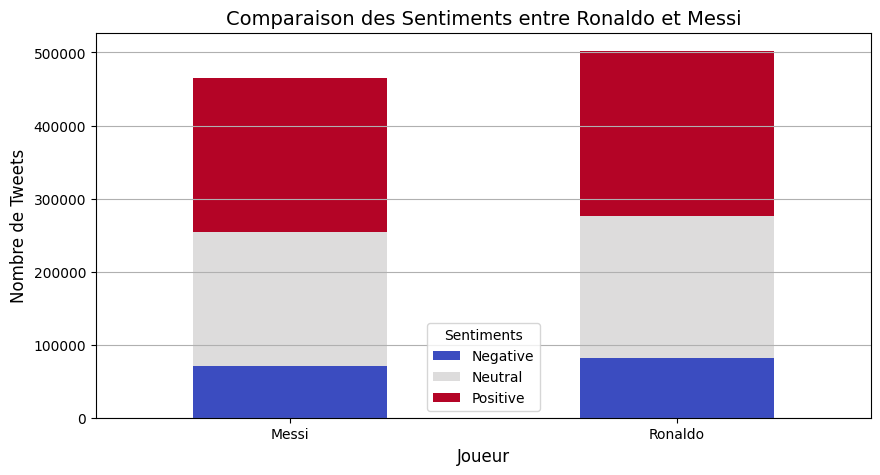

In [97]:
# Compter les sentiments pour chaque joueur
sentiment_counts = df_combined.groupby(["player", "Sentiments"]).size().unstack()

# Tracage du graphique
plt.figure(figsize=(15, 8))
sentiment_counts.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm")

# Personnalisation du graphiique
plt.title("Comparaison des Sentiments entre Ronaldo et Messi", fontsize=14)
plt.xlabel("Joueur", fontsize=12)
plt.ylabel("Nombre de Tweets", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Sentiments", fontsize=10)
plt.grid(axis="y")

plt.show()

EVOLUTION DES SENTIMENTS DE RONALDO ET MESSI AU FIL DU TEMPS

In [99]:
# !pip install textblob


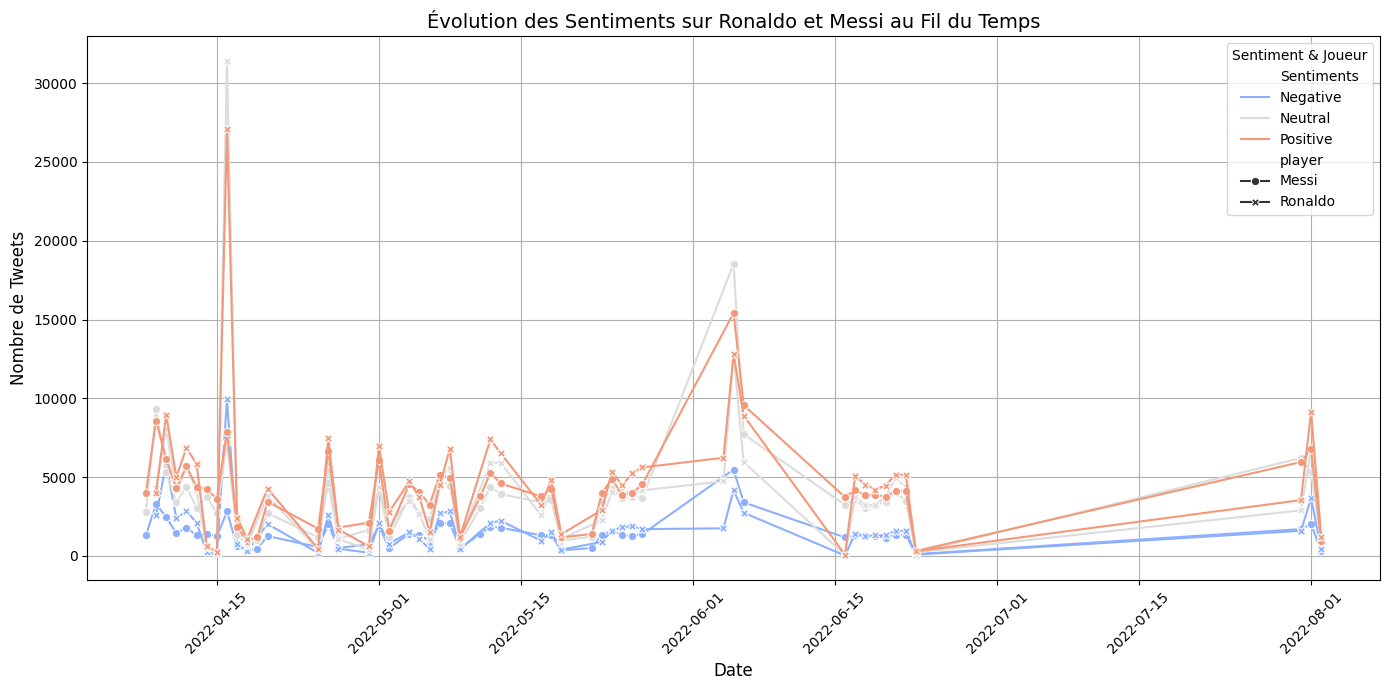

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la colonne Timestamp en datetime
df_combined["Timestamp"] = pd.to_datetime(df_combined["Timestamp"], errors="coerce")

# Trier les données par date
df_combined = df_combined.sort_values(by="Timestamp")

# Grouper les tweets par date, joueur et sentiment
trend_sentiments = df_combined.groupby([df_combined["Timestamp"].dt.date, "player", "Sentiments"]).size().reset_index(name="count")

# Configuration de la figure
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=trend_sentiments,
    x="Timestamp",
    y="count",
    hue="Sentiments",
    style="player",  # Différencier Ronaldo et Messi
    markers=True,
    dashes=False,
    palette="coolwarm"
)

# Personnalisation
plt.title("Évolution des Sentiments sur Ronaldo et Messi au Fil du Temps", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de Tweets", fontsize=12)
plt.xticks(rotation=45)  # Incliner les dates pour meilleure lisibilité
plt.legend(title="Sentiment & Joueur", fontsize=10)
plt.grid(True)
plt.tight_layout()

# Affichage
plt.show()


EVOLUTION DES SENTIMENTS SUR RONALDO ET MESSI AU FIL DU TEMPS (SELON LES REGIONS)

In [99]:
print("Colonnes disponibles :", df_combined.columns)
print(df_combined[["geo"]].head())  # Afficher quelques valeurs


Colonnes disponibles : Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count', 'player',
       'Sentiments'],
      dtype='object')
       geo
965148  -1
965147  -1
965146  -1
965145  -1
965144  -1


In [100]:
# Vérifier les valeurs uniques de la colonne "geo"
print(df_combined["geo"].value_counts().head())  # Top 20 régions les plus mentionnées


geo
-1                  957056
003e299707d0375b       368
01eddd9d0dbec2c8       310
00817d75276a95cf       226
009b4bcc18019797       200
Name: count, dtype: int64


VERIFIER LE NOMBRE TOTAL DE TWEETS QUI ONT UNE VALEUR UTILISABLE DANS "geo" :

In [101]:
# Compter le nombre total de tweets et ceux qui ont une géolocalisation exploitable
total_tweets = len(df_combined)
tweets_with_geo = df_combined[df_combined["geo"] != "-1"]

print(f"Nombre total de tweets : {total_tweets}")
print(f"Nombre de tweets avec une valeur GEO exploitable : {len(tweets_with_geo)}")
print(f"Proportion de tweets géolocalisés : {len(tweets_with_geo) / total_tweets:.2%}")


Nombre total de tweets : 967149
Nombre de tweets avec une valeur GEO exploitable : 10093
Proportion de tweets géolocalisés : 1.04%


In [102]:
# Supprimer les tweets sans localisation valide
df_geo = df_combined[df_combined["geo"] != "-1"]  #.copy() peut être ajouter pour modif différente dans la mémoire

# Vérifier à nouveau les valeurs GEO disponibles
print(df_geo["geo"].value_counts().head(20))


geo
003e299707d0375b    368
01eddd9d0dbec2c8    310
00817d75276a95cf    226
009b4bcc18019797    200
00e55e2b4c491c5f    166
000c69ad123213a8    143
01e215db7136a37e    139
dd9c0d7d7e07eb49    134
0065f09a6666479e     94
315b740b108481f6     88
006c6743642cb09c     86
01ed1f9a43bfb9bd     76
011a942e0a0e8fb2     73
0008cb6457ff0b55     64
a0583a9994e6bf1b     59
001907e868d06e24     57
70957ac3123b3249     54
00c822476a63c75b     54
c884a1b7e3a91f5e     53
3797791ff9c0e4c6     52
Name: count, dtype: int64


In [122]:
# Vérifier combien de tweets ont une géolocalisation valide
geo_counts = df_combined["geo"].value_counts()
print("Nombre total de tweets :", len(df_combined))
print("Nombre de tweets avec une valeur GEO valide :", len(geo_counts))
print("Top 10 valeurs GEO :", geo_counts.head(10))


Nombre total de tweets : 23435
Nombre de tweets avec une valeur GEO valide : 210
Top 10 valeurs GEO : geo
-1                  23087
01eddd9d0dbec2c8       41
00817d75276a95cf       13
003e299707d0375b       10
009b4bcc18019797        7
000c69ad123213a8        4
011a942e0a0e8fb2        4
173c2bb9d42baaa5        4
001907e868d06e24        3
8b9ec16fdc0d7e55        3
Name: count, dtype: int64


In [123]:
# !pip install geopy

TRANSFORMATION DES CODES DE GEOLOCALISATION EN "REGIONS" 

In [55]:
# Obtenir les codes geo uniques

df_geo = df_combined[df_combined["geo"] != "-1"].copy()
geo_codes = df_geo["geo"].unique()
print(geo_codes[:10])  # Afficher les 10 premiers codes

['5dbba3e8fa522441' '01546f6801ce58cd' '0065f09a6666479e'
 '001aff55522d96c9' '7ef79c5ab17d518c' '001c0a9c3c005adf'
 '7746cc53490be860' 'd16815010421ff73' '3bc1b6cfd27ef7f6'
 'f773199c979358a5']


UTILISATION DE L'API X (GEO)

In [52]:
import requests
import time

BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAKqjzgEAAAAA5hbhg3eSLqNZzXYCe6sdHF8Gtzc%3DmtvWtr6HZkRd5tc9NZ0mTqmOBGFE6YAykio26AB2LqgBfdw1b6"
geo_to_region = {}                                             # Contiendra la convertion des codes geos en Régions

for geo_id in geo_codes:
    url = f"https://api.twitter.com/2/tweets?place.fields=full_name&id={geo_id}"
    headers = {"Authorization": f"Bearer {BEARER_TOKEN}"}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        if "full_name" in data:
            geo_to_region[geo_id] = data["full_name"]
    else:
        geo_to_region[geo_id] = "Inconnu"
    
    time.sleep(1)  # Éviter les limites de requêtes

# Ajouter la nouvelle colonne "Région"
df_geo["Région"] = df_geo["geo"].map(geo_to_region)



# -	BEARER TOKEN : AAAAAAAAAAAAAAAAAAAAAKqjzgEAAAAA5hbhg3eSLqNZzXYCe6sdHF8Gtzc%3DmtvWtr6HZkRd5tc9NZ0mTqmOBGFE6YAykio26AB2LqgBfdw1b6
# -	Access Token  :  1896163083627687936-5IsaBeDqygUlvBH8kMNhgdRK2ggml1
# -	Access Token Secret : XOY2XQ2d9OeSceKArDb24G0hnKb7Eo1V0Y1o4NuEMEQVo




C:\Users\bintu\AppData\Local\Temp\ipykernel_29540\3718760526.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo["Région"] = df_geo["geo"].map(geo_to_region)


In [ ]:
print(df_combined.columns)

Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count', 'player',
       'Sentiments'],
      dtype='object')


In [3]:
# print(geo_to_region)  # Vérifie si des correspondances existent

DECODAGE AVEC GEOCODERS

In [58]:
# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent="geo_analysis")

# # Fonction pour convertir un ID geo en un pays
# def geo_to_country(geo_id):
#     try:
#         location = geolocator.geocode(geo_id, exactly_one=True)
#         if location:
#             return location.address.split(",")[-1].strip()  # Récupérer le pays
#     except:
#         return None

# # Appliquer la fonction sur un échantillon de 10 tweets géolocalisés
# df_combined["country"] = df_combined["geo"].apply(lambda x: geo_to_country(x) if x != "-1" else None)

# # Vérifier si ça fonctionne
# print(df_combined[["geo", "country"]].dropna().head(10))


FINALEMENT LES CODES GEOS N'ONT PAS PU ETRE DECODES CAR L'API TWITTER NE LE PERMETS PLUS DEPUIS QUELQUES TEMPS ET PUISQUE C'EST UN FORMAT TWEETER, LE GEOCODER NE PEUX PAS LES INTERPRETER

!!! LANDSCAPE!!! NOUVELLE APPROOCHE POUR DETERMINER LES REGIONS EN ANALYSANT LA LANGUE DES TWEETS

In [105]:
#Installation de Langdetect

# !pip install langdetect
from langdetect import detect, DetectorFactory
import pandas as pd

DetectorFactory.seed = 0  # Pour rendre la détection reproductible

def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"  # Si on ne peut pas détecter la langue

df_combined["langue"] = df_combined["content"].apply(detect_language)

RECUPERATION DE LA LANGUE ET ASSOCIATION A UNE REGION

CREATION D'UN DICTIONNAIRE DE CORRESPONDANCE ENTRE LANGUE ET REGION

In [44]:
langue_to_region = {
    "fr": "Europe francophone",
    "en": "Amérique du Nord / Monde anglophone",
    "es": "Espagne / Amérique latine",
    "pt": "Brésil / Portugal",
    "de": "Europe germanophone",
    "it": "Italie",
    "nl": "Pays-Bas / Belgique",
    "ru": "Russie",
    "ar": "Moyen-Orient / Maghreb",
    "tr": "Turquie",
    "zh": "Chine",
    "ja": "Japon",
    "ko": "Corée du Sud",
    "unknown": "Non déterminé"
}

# Ajouter la colonne "Région"
df_combined["region"] = df_combined["lang"].map(langue_to_region).fillna("Autre")


In [45]:
# Affichage de quelques valeurs pour voir si les régions ont bien été assignées :

print(df_combined[["content", "lang", "region"]].head(20))

                                                  content lang  \
965148  a second clip messi s argentina clip alone wou...   en   
965147  really messi being on the pitch and creating c...   en   
965146  iniesta wasnt that great bar wc in especially ...   en   
965145  messi had better teammates at barcelona xavi i...   en   
965144  hahaha that s rich coming from a messi groupie...   en   
965143  kudos to you being able to restrict a messi co...   en   
965142  man said he competed messi was so shit that we...   en   
965141  unbelievable player i can actually mention som...   en   
965140  yep messi played for the club ronaldo played f...   en   
965139  witness the incredible the gtco food and drink...   en   
965138  stevie g regularly dropped alfredo to the benc...   en   
965137  i respect messi a lot for what he does on the ...   en   
965136  if you regard messi as the greatest of all tim...   en   
965134  messi was the system at barca and still is at ...   en   
965135  so

FILTRAGE DES VALEURS MANQUANTES

In [46]:
# On filtre les valeurs manquantes :

df_combined = df_combined.dropna(subset=["region"])

In [50]:
print(df_combined.columns)


Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count', 'player',
       'Sentiments', 'region'],
      dtype='object')


COMPTAGE DU NOMBRE DE TWEETS EN FONCTION DE LA DATE, DU JOUR, DE LA REGION ET DU SENTIMENT

In [51]:
import matplotlib.pyplot as plt

# Convertir Timestamp en datetime si ce n'est pas encore fait
df_combined["Timestamp"] = pd.to_datetime(df_combined["Timestamp"], errors="coerce")

# Extraire uniquement la date (sans l'heure)
df_combined["Date"] = df_combined["Timestamp"].dt.date

# Grouper les tweets par date, région, joueur et sentiment
trend_sentiments = df_combined.groupby(["Date", "region", "player", "Sentiments"]).size().unstack()

# Vérifier les premières lignes
print(trend_sentiments.head())

Sentiments                                              Negative  Neutral  \
Date       region                              player                       
2022-04-08 Amérique du Nord / Monde anglophone Messi        1301     2802   
2022-04-09 Amérique du Nord / Monde anglophone Messi        3279     9305   
                                               Ronaldo      2567     4292   
2022-04-10 Amérique du Nord / Monde anglophone Messi        2470     5333   
                                               Ronaldo      5861     8021   

Sentiments                                              Positive  
Date       region                              player             
2022-04-08 Amérique du Nord / Monde anglophone Messi        4011  
2022-04-09 Amérique du Nord / Monde anglophone Messi        8584  
                                               Ronaldo      3979  
2022-04-10 Amérique du Nord / Monde anglophone Messi        6166  
                                               Ronaldo    

AFFICHAGE DU GRAPHIQUE : EVOLUTION DES SENTIMENTS POUR RONALDO ET MESSI EN FONCTION DES REGIONS

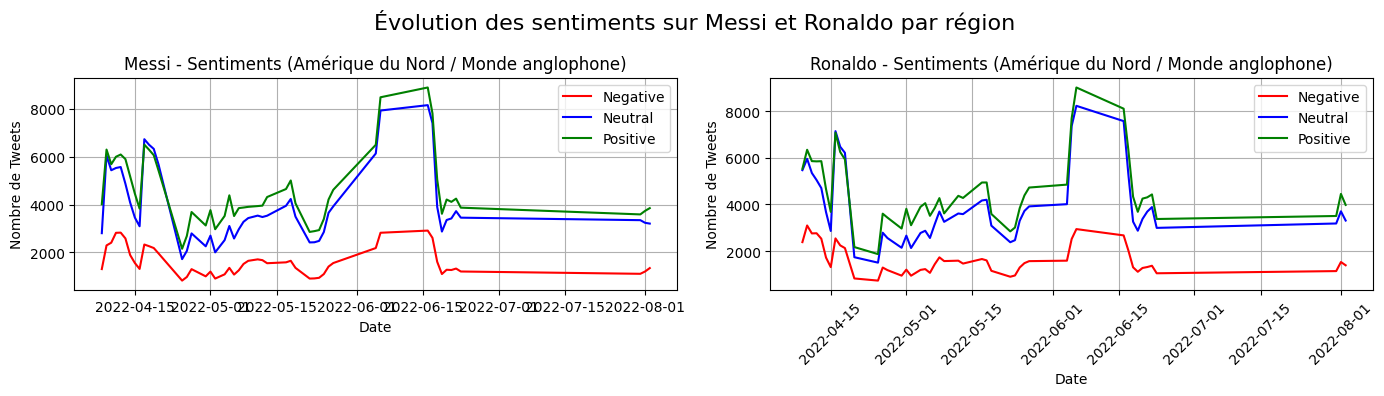

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir Timestamp en datetime si ce n'est pas déjà fait
df_combined["Timestamp"] = pd.to_datetime(df_combined["Timestamp"], errors="coerce")

# Extraire uniquement la date
df_combined["Date"] = df_combined["Timestamp"].dt.date

# Grouper les tweets par date, région, joueur et sentiment
trend_sentiments = df_combined.groupby(["Date", "region", "player", "Sentiments"]).size().unstack()

# Lissage des données : moyenne glissante sur 7 jours
trend_sentiments = trend_sentiments.rolling(window=7, min_periods=1).mean()

# Liste des régions uniques
regions = df_combined["region"].dropna().unique()

# Définir la palette de couleurs pour les sentiments
sentiment_colors = {"Positive": "green", "Neutral": "blue", "Negative": "red"}

# Créer la figure et ajuster le layout pour gérer plusieurs régions
fig, axes = plt.subplots(nrows=len(regions), ncols=2, figsize=(14, len(regions) * 4), sharex=True)

# Si une seule région, forcer axes à être un tableau
if len(regions) == 1:
    axes = [axes]

# Tracer les tendances des sentiments pour chaque région
for i, region in enumerate(regions):
    if region in trend_sentiments.index.get_level_values("region"):
        region_data = trend_sentiments.xs(region, level="region")

        # Tracer Messi
        ax_messi = axes[i][0]
        messi_data = region_data.xs("Messi", level="player")
        messi_data.plot(ax=ax_messi, color=[sentiment_colors.get(s, "black") for s in messi_data.columns])
        ax_messi.set_title(f"Messi - Sentiments ({region})")
        ax_messi.set_ylabel("Nombre de Tweets")
        ax_messi.legend(loc="upper right")
        ax_messi.grid(True)

        # Tracer Ronaldo
        ax_ronaldo = axes[i][1]
        ronaldo_data = region_data.xs("Ronaldo", level="player")
        ronaldo_data.plot(ax=ax_ronaldo, color=[sentiment_colors.get(s, "black") for s in ronaldo_data.columns])
        ax_ronaldo.set_title(f"Ronaldo - Sentiments ({region})")
        ax_ronaldo.set_ylabel("Nombre de Tweets")
        ax_ronaldo.legend(loc="upper right")
        ax_ronaldo.grid(True)

# Ajuster l'affichage des dates
plt.xticks(rotation=45)
plt.xlabel("Date")
fig.suptitle("Évolution des sentiments sur Messi et Ronaldo par région", fontsize=16)
plt.tight_layout()
plt.show()


LES PLUS FREQUAMENT UTILISES EN RAPPORT AVE MESSI ET RONALDO. AINSI QUE LEURS COORELATION AVEC LE RESULTAT DES SENTIMENTS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bintu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\bintu\AppData\Local\Temp\ipykernel_27964\1471245850.py:39: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


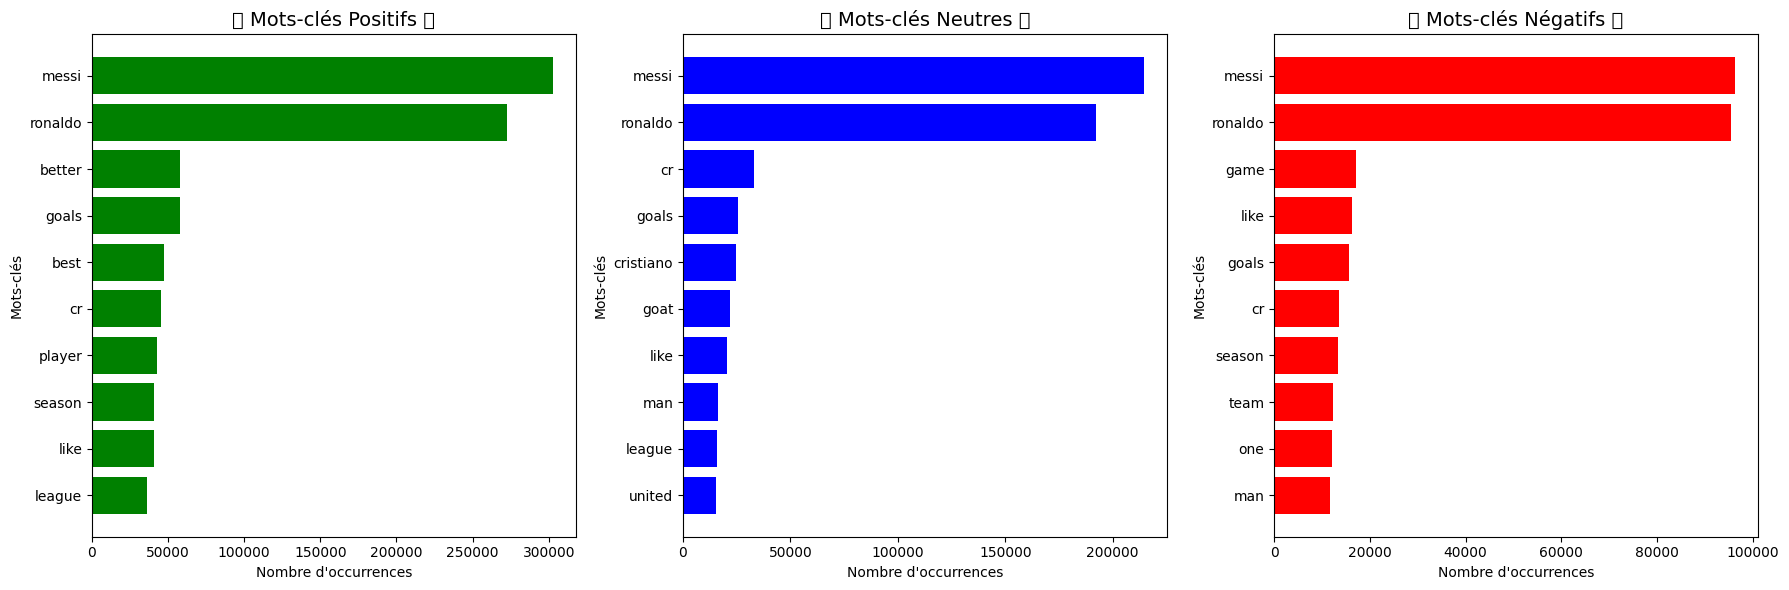

In [ ]:


# stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english") + stopwords.words("french"))

# Fonction pour extraire les mots les plus fréquents (sans nettoyage approfondi)
def get_top_keywords(df, sentiment, top_n=10):
    all_text = " ".join(df[df["Sentiments"] == sentiment]["content"].dropna())  # Concaténer tous les tweets
    all_words = re.findall(r"\b\w+\b", all_text.lower())  # Extraire uniquement les mots
    words_freq = Counter(all_words)  # Compter les occurrences des mots
    words_freq = {word: count for word, count in words_freq.items() if word not in stop_words}  # Supprimer les stopwords
    return dict(sorted(words_freq.items(), key=lambda item: item[1], reverse=True)[:top_n])

# Obtenir les mots les plus fréquents par sentiment
top_positive = get_top_keywords(df_combined, "Positive", 10)
top_neutral = get_top_keywords(df_combined, "Neutral", 10)
top_negative = get_top_keywords(df_combined, "Negative", 10)

# Création d'un graphique en barres
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

def plot_bar_chart(word_freq, ax, title, color):
    if word_freq:  # Vérifier qu'il y a bien des mots à afficher
        words, counts = zip(*word_freq.items())
        ax.barh(words, counts, color=color)
        ax.set_title(title, fontsize=14)
        ax.set_xlabel("Nombre d'occurrences")
        ax.set_ylabel("Mots-clés")
        ax.invert_yaxis()  # Affichage des mots les plus fréquents en haut
    else:
        ax.set_title(title, fontsize=14)
        ax.text(0.5, 0.5, "Pas assez de données", ha="center", va="center", fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])

plot_bar_chart(top_positive, axes[0], "🔹 Mots-clés Positifs 🔹", "green")
plot_bar_chart(top_neutral, axes[1], "🔹 Mots-clés Neutres 🔹", "blue")
plot_bar_chart(top_negative, axes[2], "🔹 Mots-clés Négatifs 🔹", "red")

plt.tight_layout()
plt.show()


Pas de données précises pour rpondre à la question 3